# Feature Engineering

**Feature Engineering** é o processo de usar o conhecimento de domínio para extrair **features** de dados brutos. Esses features podem ser usados para melhorar o desempenho de algoritmos de Machine Learning. 

A engenharia de features pode ser considerada como o próprio machine learning aplicado.

Um feature é um atributo ou propriedade compartilhada por todas as unidades independentes nas quais a análise ou previsão deve ser feita. Qualquer atributo pode ser um feature, desde que seja útil para o modelo.

O propósito de um feature, além de ser um atributo, seria muito mais fácil de entender no contexto de um problema. Um feature é uma característica que pode ajudar na solução do problema.

Os features são importantes para os modelos preditivos e influenciam os resultados.

O processo de engenharia de features é:

- Brainstorming ou testes de features; 
- Decidir quais features criar;
- Criação de features;
- Verificar como os features funcionam com seu modelo;
- Melhorar seus features, se necessário;
- Volte para o brainstorming / criação de mais features até que o trabalho esteja concluído.

Um feature pode ser fortemente relevante (ou seja, o feature contém informações que não existem em nenhum outro feature), relevante, pouco relevante (algumas informações que outros features incluem) ou irrelevante.

Para mais detalhes, visite o [tutorial do Kaggle](https://www.kaggle.com/learn/feature-engineering).

# Preparação de Dados

A preparação de dados é o ato de manipular (ou pré-processar) dados brutos (que podem vir de fontes de dados diferentes) em uma forma que pode ser analisada de forma rápida e precisa, por exemplo, para fins comerciais.

A preparação de dados é a primeira etapa em projetos de analítica de dados e pode incluir muitas tarefas discretas, como carregamento de dados ou ingestão de dados, fusão de dados, limpeza de dados, aumento de dados e entrega de dados.

Mais detalhes podem ser encontrados no [Wikipedia](https://en.wikipedia.org/wiki/Data_preparation).

## Notebook

Neste notebook vamos experimentar os seguintes problemas:

- Outliers nos dados
- Dados faltantes (missing)
- Dados categóricos

Começaremos importando as bibliotecas necessárias.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Outliers

A seguir vamos definir uma função capaz de criar uma distribuição aleatória de idades.

In [2]:
def create_ages(mu=50, sigma=13, num_samples=100, seed=42):
    np.random.seed(seed)
    sample_ages = np.random.normal(loc=mu, scale=sigma, size=num_samples)
    sample_ages = np.round(sample_ages, decimals=0)
    return sample_ages

In [5]:
sample = create_ages()
sample[:12]

array([56., 48., 58., 70., 47., 47., 71., 60., 44., 57., 44., 44.])

Para visualizarmos a distribuição dos dados, podemos usar um **distplot**.

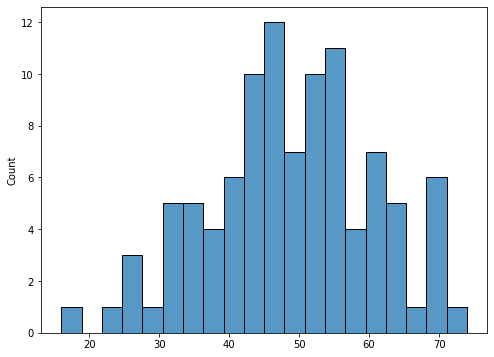

In [9]:
plt.figure(figsize=(8,6))
sns.histplot(sample, bins=20);

Também é interessante criarmos um **boxplot** para nos auxiliar na visualização.

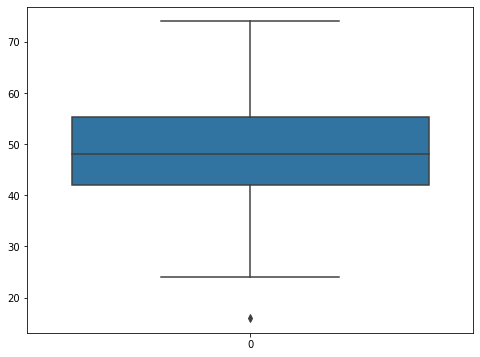

In [11]:
plt.figure(figsize=(8,6))
sns.boxplot(data=sample);

Vamos agora criar uma **Series** pandas com nossas amostras de idades para melhor organizarmos elas.

In [12]:
ser = pd.Series(sample)
ser.head()

0    56.0
1    48.0
2    58.0
3    70.0
4    47.0
dtype: float64

Podemos agora chamar o método **describe()** para obter diversas informações úteis.

In [13]:
ser.describe()

count    100.00000
mean      48.66000
std       11.82039
min       16.00000
25%       42.00000
50%       48.00000
75%       55.25000
max       74.00000
dtype: float64

O [IQR](https://www.statisticshowto.com/probability-and-statistics/interquartile-range/) descreve os 50% intermediários dos valores quando ordenados do menor para o maior.

Podemos facilmente calculá-lo e depois obter o **lower_limit**.

In [14]:
IQR = 55.25 - 42.0
lower_limit = 42.0 - 1.5 * (IQR)
lower_limit

22.125

E agora podemos obter todos os valores que estão acima do **lower_limit** (outlier).

In [16]:
ser[ser > lower_limit][:10]

0    56.0
1    48.0
2    58.0
3    70.0
4    47.0
5    47.0
6    71.0
7    60.0
8    44.0
9    57.0
dtype: float64

Também podemos descobrir os percentiles através da função **percentile()** da biblioteca numpy.

In [17]:
np.percentile(sample,75)

55.25

In [18]:
np.percentile(sample,25)

42.0

### Novos Dados

Vamos agora carregar um conjunto de dados para fazermos mais experimentos.

Trata-se de um conjunto de dados sobre casas, onde existem dados faltando e outliers.

O objetivo é usá-lo para fazer previsão do preço de uma casa com base em suas diversas features, mas para isso, ele precisa ser preparado.

In [20]:
df = pd.read_csv('dados/Ames_Housing_Data.csv')
df.head(7)

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
5,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500
6,527127150,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,213500


Podemos verificar quais as features estãos mais relacionadas com **SalePrice**.

In [22]:
df.corr()['SalePrice'].sort_values()

PID               -0.246521
Enclosed Porch    -0.128787
Kitchen AbvGr     -0.119814
Overall Cond      -0.101697
MS SubClass       -0.085092
Low Qual Fin SF   -0.037660
Bsmt Half Bath    -0.035835
Yr Sold           -0.030569
Misc Val          -0.015691
BsmtFin SF 2       0.005891
3Ssn Porch         0.032225
Mo Sold            0.035259
Pool Area          0.068403
Screen Porch       0.112151
Bedroom AbvGr      0.143913
Bsmt Unf SF        0.182855
Lot Area           0.266549
2nd Flr SF         0.269373
Bsmt Full Bath     0.276050
Half Bath          0.285056
Open Porch SF      0.312951
Wood Deck SF       0.327143
Lot Frontage       0.357318
BsmtFin SF 1       0.432914
Fireplaces         0.474558
TotRms AbvGrd      0.495474
Mas Vnr Area       0.508285
Garage Yr Blt      0.526965
Year Remod/Add     0.532974
Full Bath          0.545604
Year Built         0.558426
1st Flr SF         0.621676
Total Bsmt SF      0.632280
Garage Area        0.640401
Garage Cars        0.647877
Gr Liv Area        0

Vamos agora plotar um gráfico de dispersão mostrando **Overall Qual** vs **SalePrice** já que eles estão fortemente correlacionados.

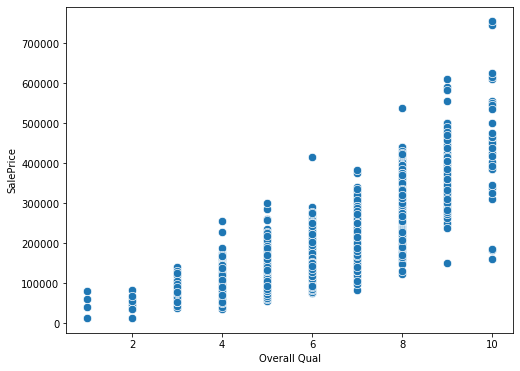

In [28]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Overall Qual', y='SalePrice', data=df, s=70);

Podemos observar que conforme a qualidade aumenta, o preço também aumenta, porém existem alguns outliers.

Vejamos agora a relação de **Gr Liv Area** vs **SalePrice**.

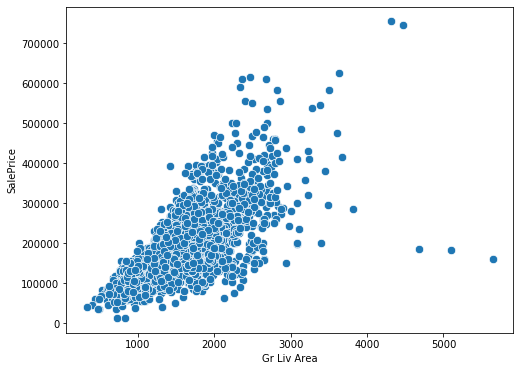

In [29]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Gr Liv Area', y='SalePrice', data=df, s=70);

Como podemos ver, temos casas grandes e de alta qualidade por preços muito baixos, aparentando serem outliers.

Podemos selecioná-las através da biblioteca **pandas**.

In [32]:
df[(df['Overall Qual'] > 8) & (df['SalePrice'] < 200_000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,533350090,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


Para evitar problemas com o nosso modelo, removeremos as entradas que são consideradas outliers.

In [33]:
df[(df['Gr Liv Area'] > 4000) & (df['SalePrice'] < 400_000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


Obtemos o índice dos outliers.

In [36]:
drop_index = df[(df['Gr Liv Area'] > 4000) & (df['SalePrice'] < 400_000)].index

Removemos eles do nosso conjunto de dados.

In [37]:
df = df.drop(drop_index, axis=0)

E agora podemos visualizar novamente os nossos dados.

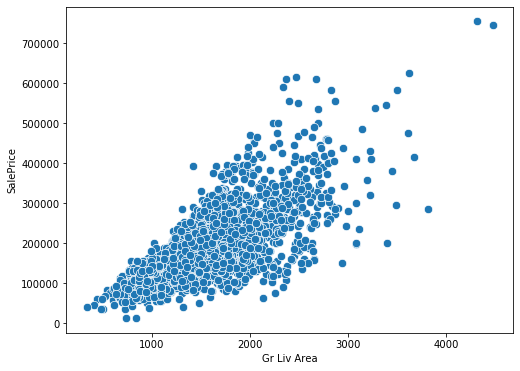

In [38]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Gr Liv Area', y='SalePrice', data=df, s=70);

### Dados Faltantes (Missing Data)

Uma vez que lidamos com os outliers, é hora de resolver o problema dos dados que estão faltando em nosso conjunto de dados.

Para isso, vamos novamente carregá-los em um **DataFrame** pandas.

In [39]:
df = pd.read_csv('dados/Ames_outliers_removed.csv')
df.head(7)

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
5,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500
6,527127150,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,213500


Para obtermos informações interessantes sobre os dados e seus tipos, podemos utilizar a função **info()**.

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2927 entries, 0 to 2926
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2927 non-null   int64  
 1   MS SubClass      2927 non-null   int64  
 2   MS Zoning        2927 non-null   object 
 3   Lot Frontage     2437 non-null   float64
 4   Lot Area         2927 non-null   int64  
 5   Street           2927 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2927 non-null   object 
 8   Land Contour     2927 non-null   object 
 9   Utilities        2927 non-null   object 
 10  Lot Config       2927 non-null   object 
 11  Land Slope       2927 non-null   object 
 12  Neighborhood     2927 non-null   object 
 13  Condition 1      2927 non-null   object 
 14  Condition 2      2927 non-null   object 
 15  Bldg Type        2927 non-null   object 
 16  House Style      2927 non-null   object 
 17  Overall Qual  

Começaremos removendo a coluna **PID**, uma vez que ela não nos será útil.

In [41]:
df = df.drop('PID', axis=1)

Para confirmar que não temos mais essa coluna, podemos usar a função **len()** no atributo `.columns`, que nos deve retornar **80**.

In [43]:
len(df.columns)

80

E agora é interessante descobrir onde estão os valores faltantes e quantos são.

In [46]:
df.isnull().sum()[:10]

MS SubClass        0
MS Zoning          0
Lot Frontage     490
Lot Area           0
Street             0
Alley           2729
Lot Shape          0
Land Contour       0
Utilities          0
Lot Config         0
dtype: int64

É muito útil termos a informação em porcentagem do que está faltando, por isso vamos criar uma função que nos reporte essa informação.

In [48]:
100 * df.isnull().sum() / len(df)

MS SubClass        0.00000
MS Zoning          0.00000
Lot Frontage      16.74069
Lot Area           0.00000
Street             0.00000
                    ...   
Mo Sold            0.00000
Yr Sold            0.00000
Sale Type          0.00000
Sale Condition     0.00000
SalePrice          0.00000
Length: 80, dtype: float64

In [49]:
def percent_miss(df):
    percent_nan = 100 * df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan > 0].sort_values()
    return percent_nan

In [51]:
percent_nan = percent_miss(df)
percent_nan

Electrical         0.034165
Garage Area        0.034165
Total Bsmt SF      0.034165
Bsmt Unf SF        0.034165
BsmtFin SF 1       0.034165
BsmtFin SF 2       0.034165
Garage Cars        0.034165
Bsmt Full Bath     0.068329
Bsmt Half Bath     0.068329
Mas Vnr Area       0.785787
Mas Vnr Type       0.785787
BsmtFin Type 1     2.733174
Bsmt Qual          2.733174
Bsmt Cond          2.733174
BsmtFin Type 2     2.767339
Bsmt Exposure      2.835668
Garage Type        5.363854
Garage Finish      5.432183
Garage Qual        5.432183
Garage Cond        5.432183
Garage Yr Blt      5.432183
Lot Frontage      16.740690
Fireplace Qu      48.582166
Fence             80.457807
Alley             93.235395
Misc Feature      96.412709
Pool QC           99.590024
dtype: float64

Agora que temos a informação de quantos dados estão faltando em cada coluna em termos de porcentagem, podemos colocá-los em um **barplot** para melhor visualização.

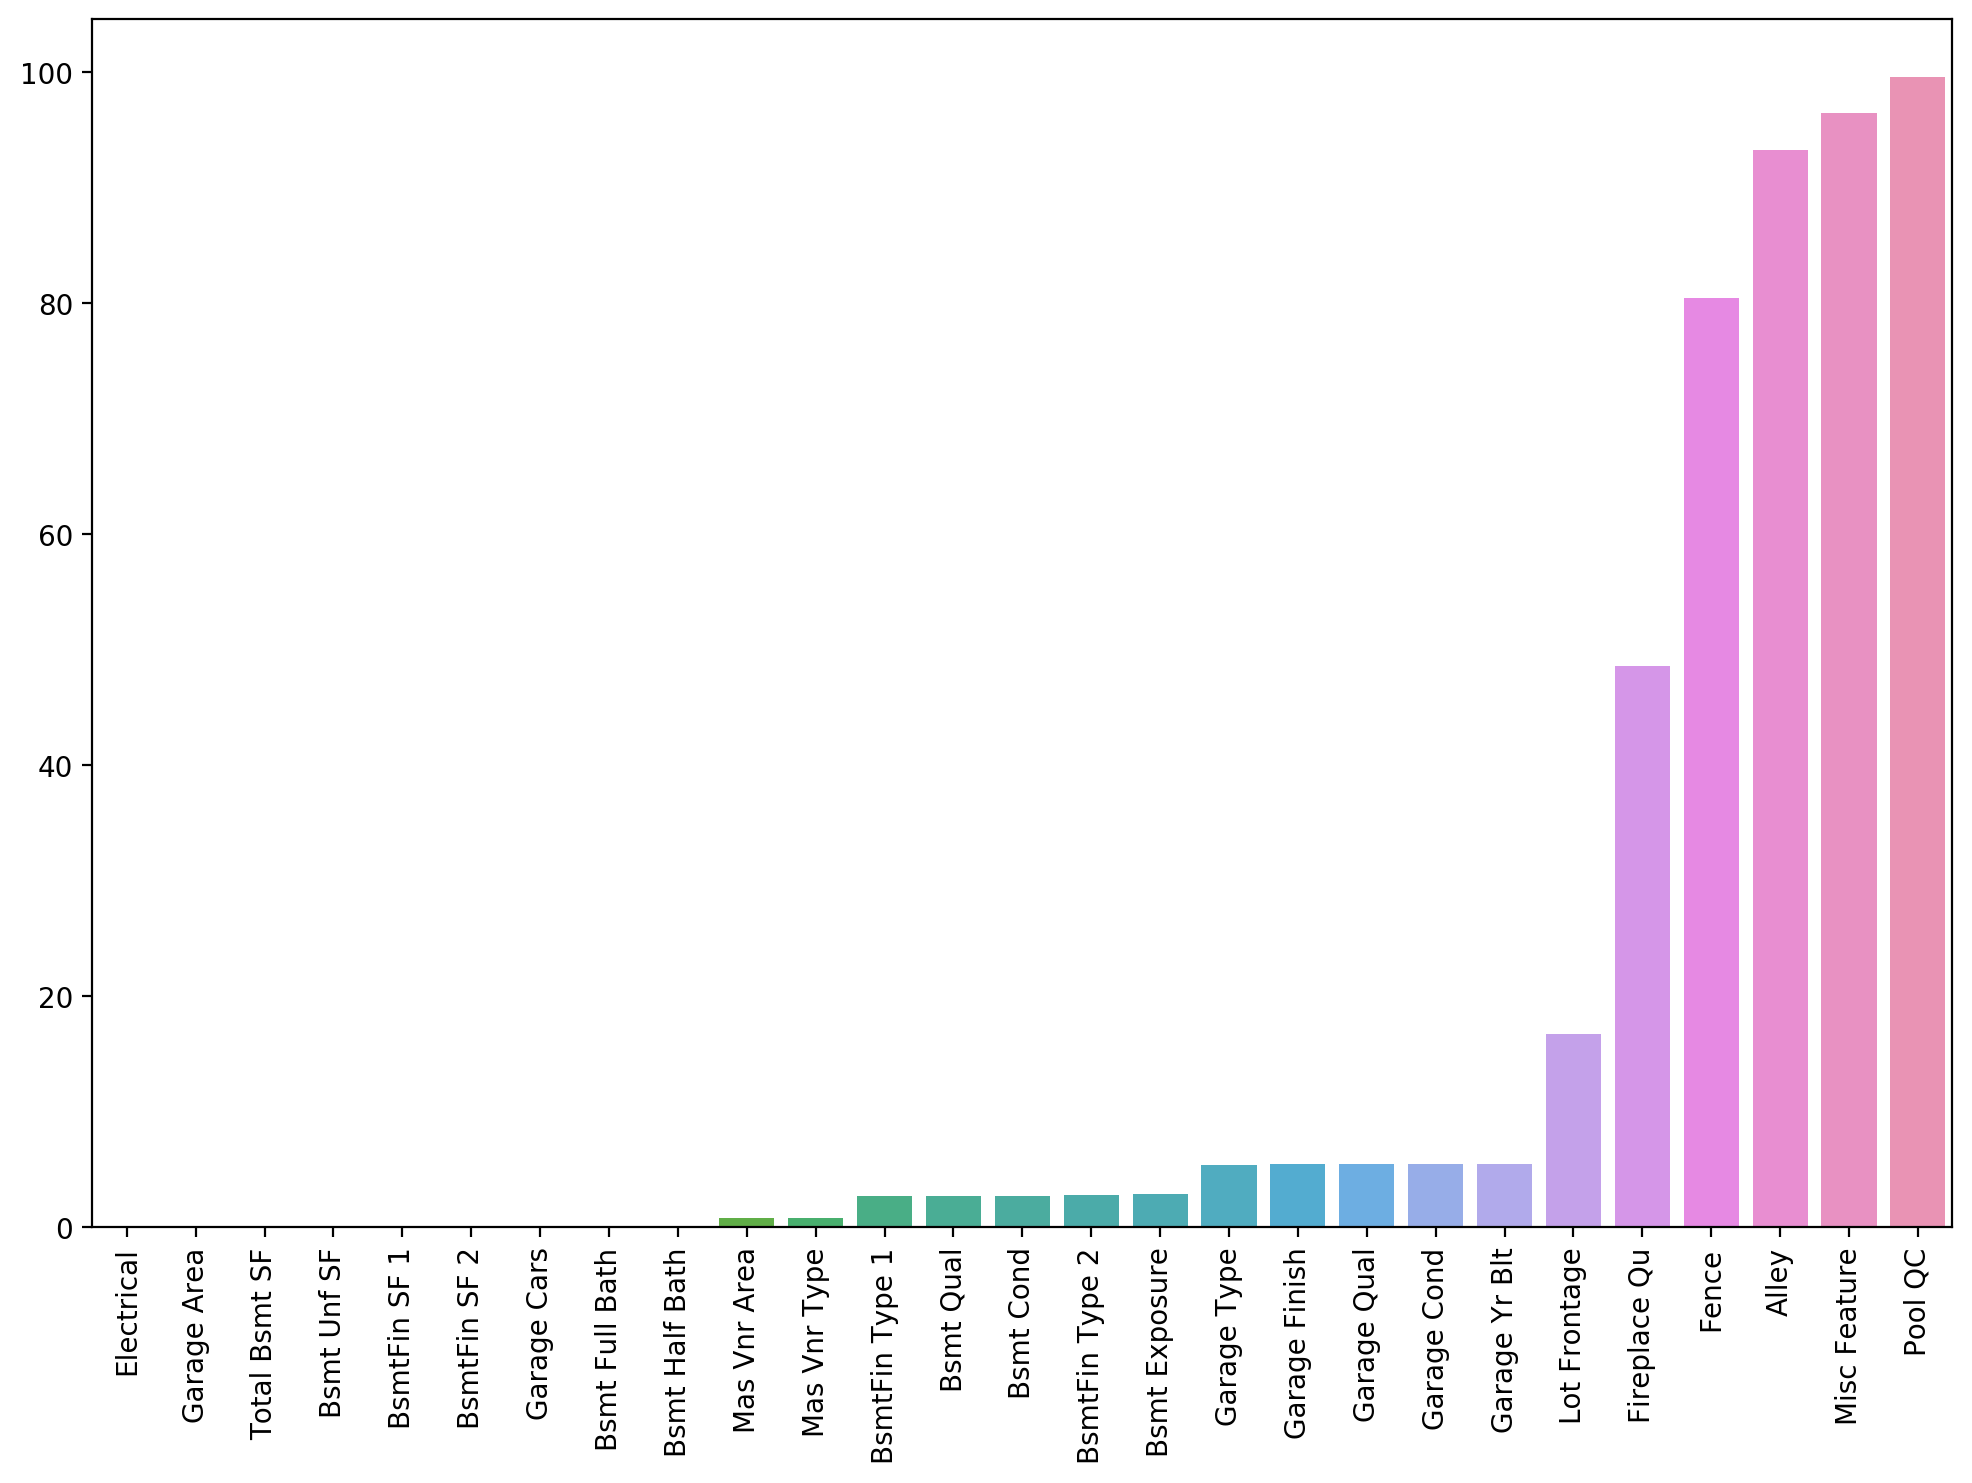

In [54]:
plt.figure(figsize=(12,8), dpi=200)
sns.barplot(x=percent_nan.index, y=percent_nan);
plt.xticks(rotation=90);

Podemos também, por exemplo, selecionar apenas as **features** com menos de 1% dos valores faltando ao alterar o **ylim** de nosso gráfico.

(0, 1)

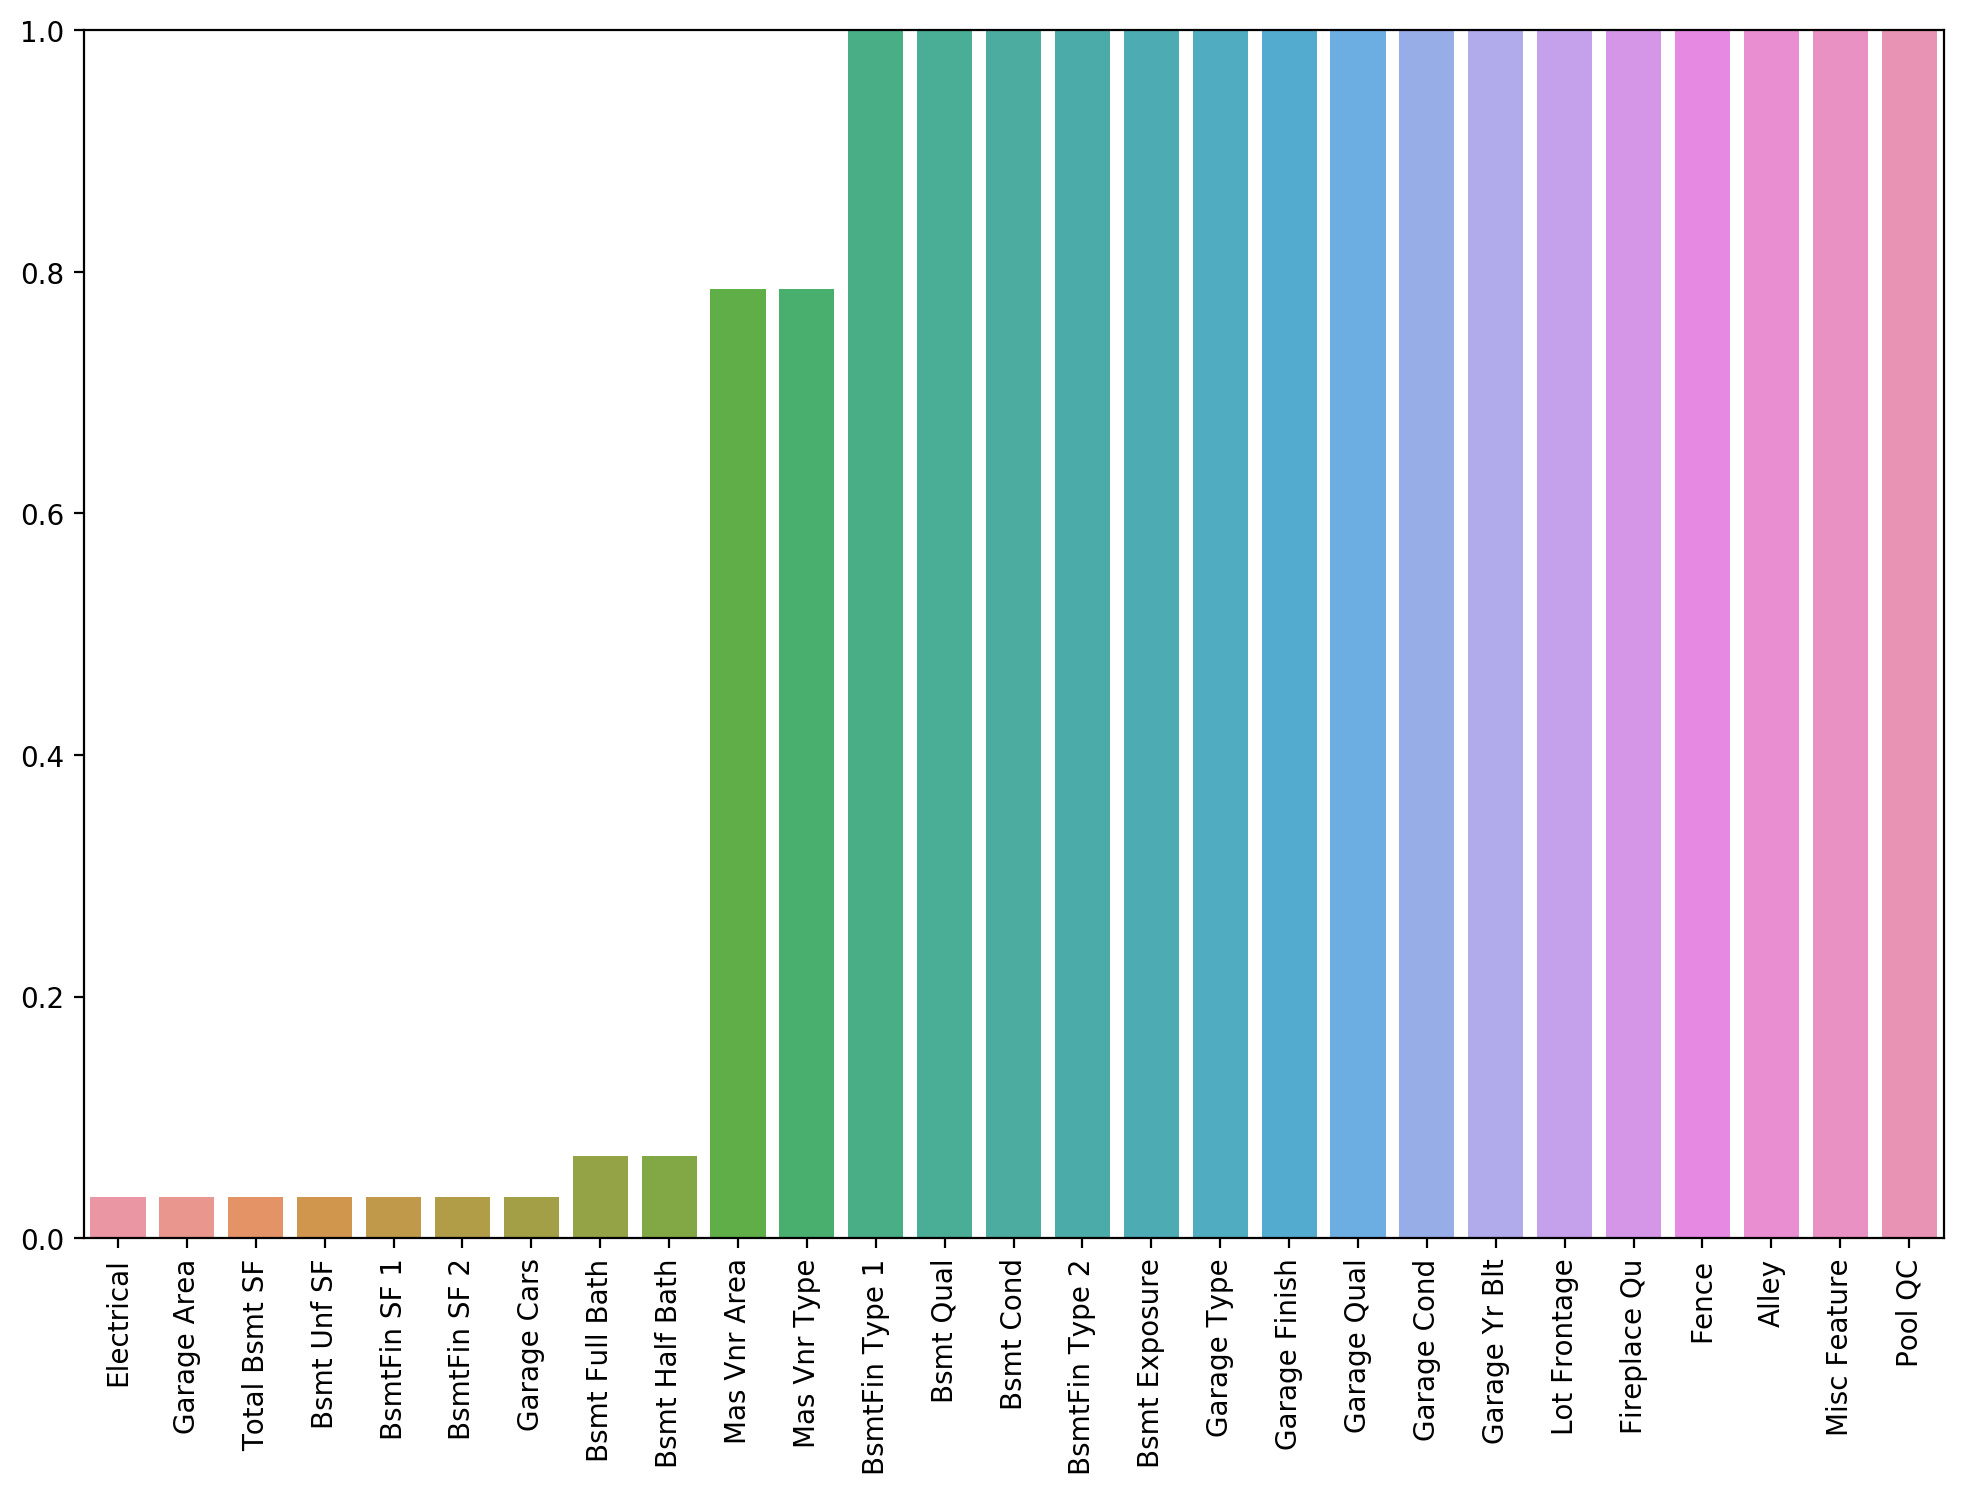

In [55]:
plt.figure(figsize=(12,8), dpi=200)
sns.barplot(x=percent_nan.index, y=percent_nan);
plt.xticks(rotation=90);
plt.ylim(0,1)

Também podemos fazer essa seleção com **pandas**.

In [56]:
percent_nan[percent_nan < 1]

Electrical        0.034165
Garage Area       0.034165
Total Bsmt SF     0.034165
Bsmt Unf SF       0.034165
BsmtFin SF 1      0.034165
BsmtFin SF 2      0.034165
Garage Cars       0.034165
Bsmt Full Bath    0.068329
Bsmt Half Bath    0.068329
Mas Vnr Area      0.785787
Mas Vnr Type      0.785787
dtype: float64

Podemos checar as linhas individuais que estão faltando.

In [57]:
df[df['Electrical'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1576,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


In [58]:
df[df['Bsmt Half Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


Vamos então eliminar as linhas das colunas **Electrical** e **Garage Cars** que estão faltando.

In [59]:
df = df.dropna(axis=0, subset=['Electrical','Garage Cars'])

E novamente calculamos a porcentagem de dados que estão faltando.

In [61]:
percent_nan = percent_miss(df)
percent_nan[percent_nan < 1]

Bsmt Unf SF       0.034188
Total Bsmt SF     0.034188
BsmtFin SF 2      0.034188
BsmtFin SF 1      0.034188
Bsmt Full Bath    0.068376
Bsmt Half Bath    0.068376
Mas Vnr Type      0.786325
Mas Vnr Area      0.786325
dtype: float64

(0, 1)

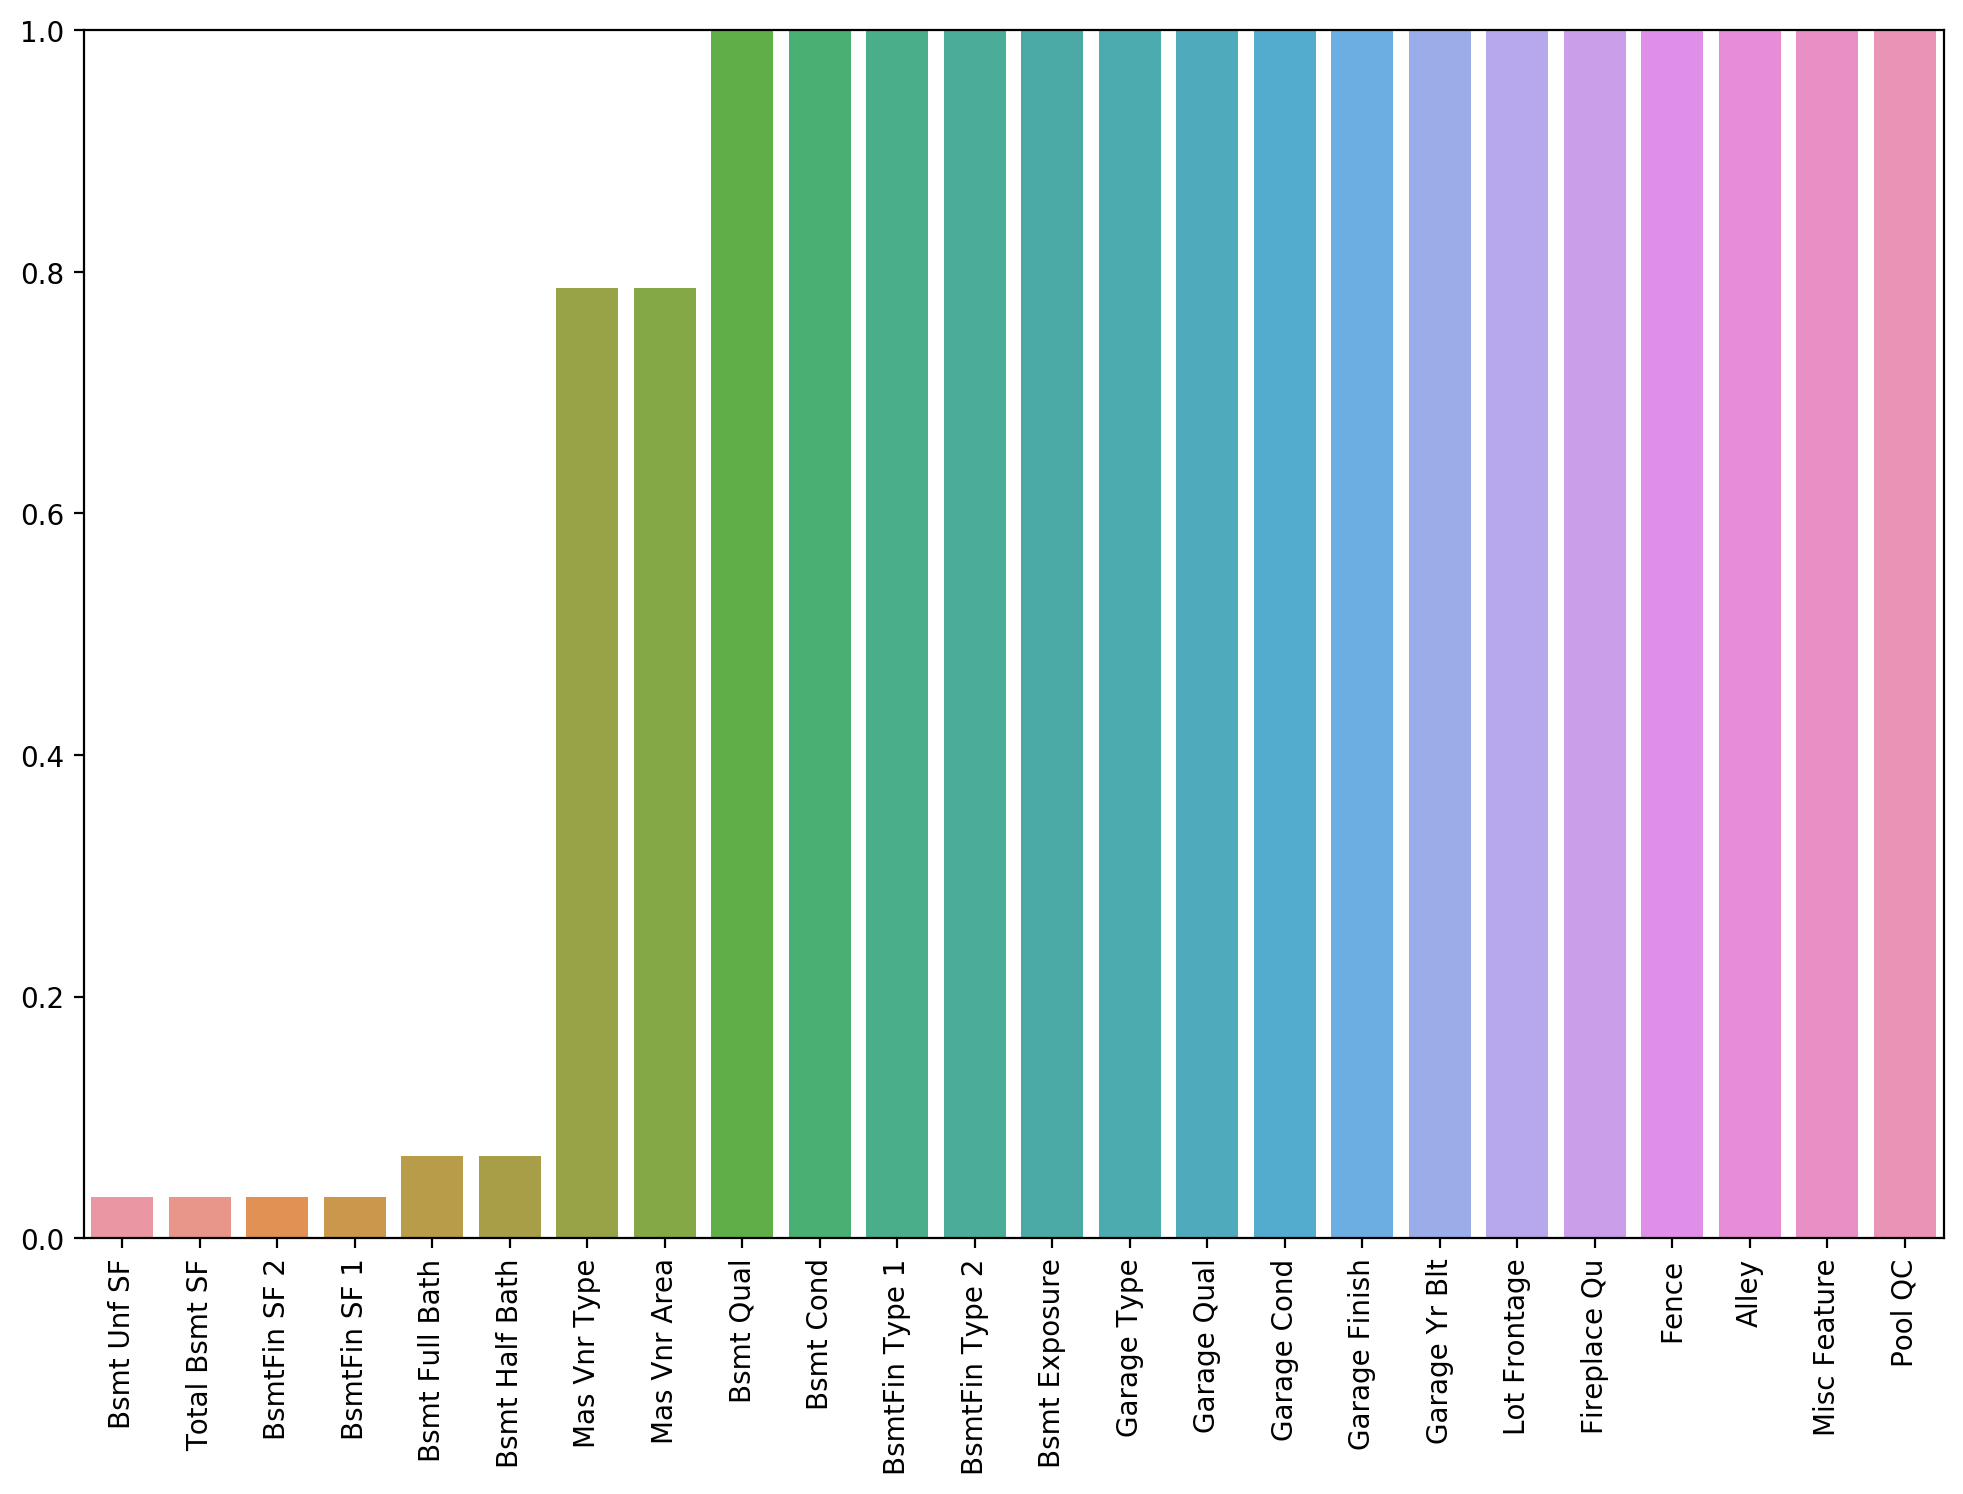

In [62]:
plt.figure(figsize=(12,8), dpi=200)
sns.barplot(x=percent_nan.index, y=percent_nan);
plt.xticks(rotation=90);
plt.ylim(0,1)

Mais uma vez checamos as colunas que possuem dados faltantes menor que 1%.

In [64]:
df[df['Bsmt Half Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [65]:
df[df['Bsmt Full Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [66]:
df[df['Bsmt Unf SF'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


Vamos agora lidar com as colunas do **porão** (Bsmt).

Para os numéricos iremos preencher os faltantes serão preenchidos com 0.

In [68]:
bsmt_num_cols = ['BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF','Bsmt Full Bath','Bsmt Half Bath']

df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)

Para os strings iremos preencher os faltantes serão preenchidos com 'None'.

In [69]:
bsmt_str_cols = ['Bsmt Qual','Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2']

df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')

E então podemos verificar se deu tudo certo.

In [70]:
df[df['Bsmt Full Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice


Novamente podemos ver o que está faltando em nosso conjunto de dados.

(0, 1)

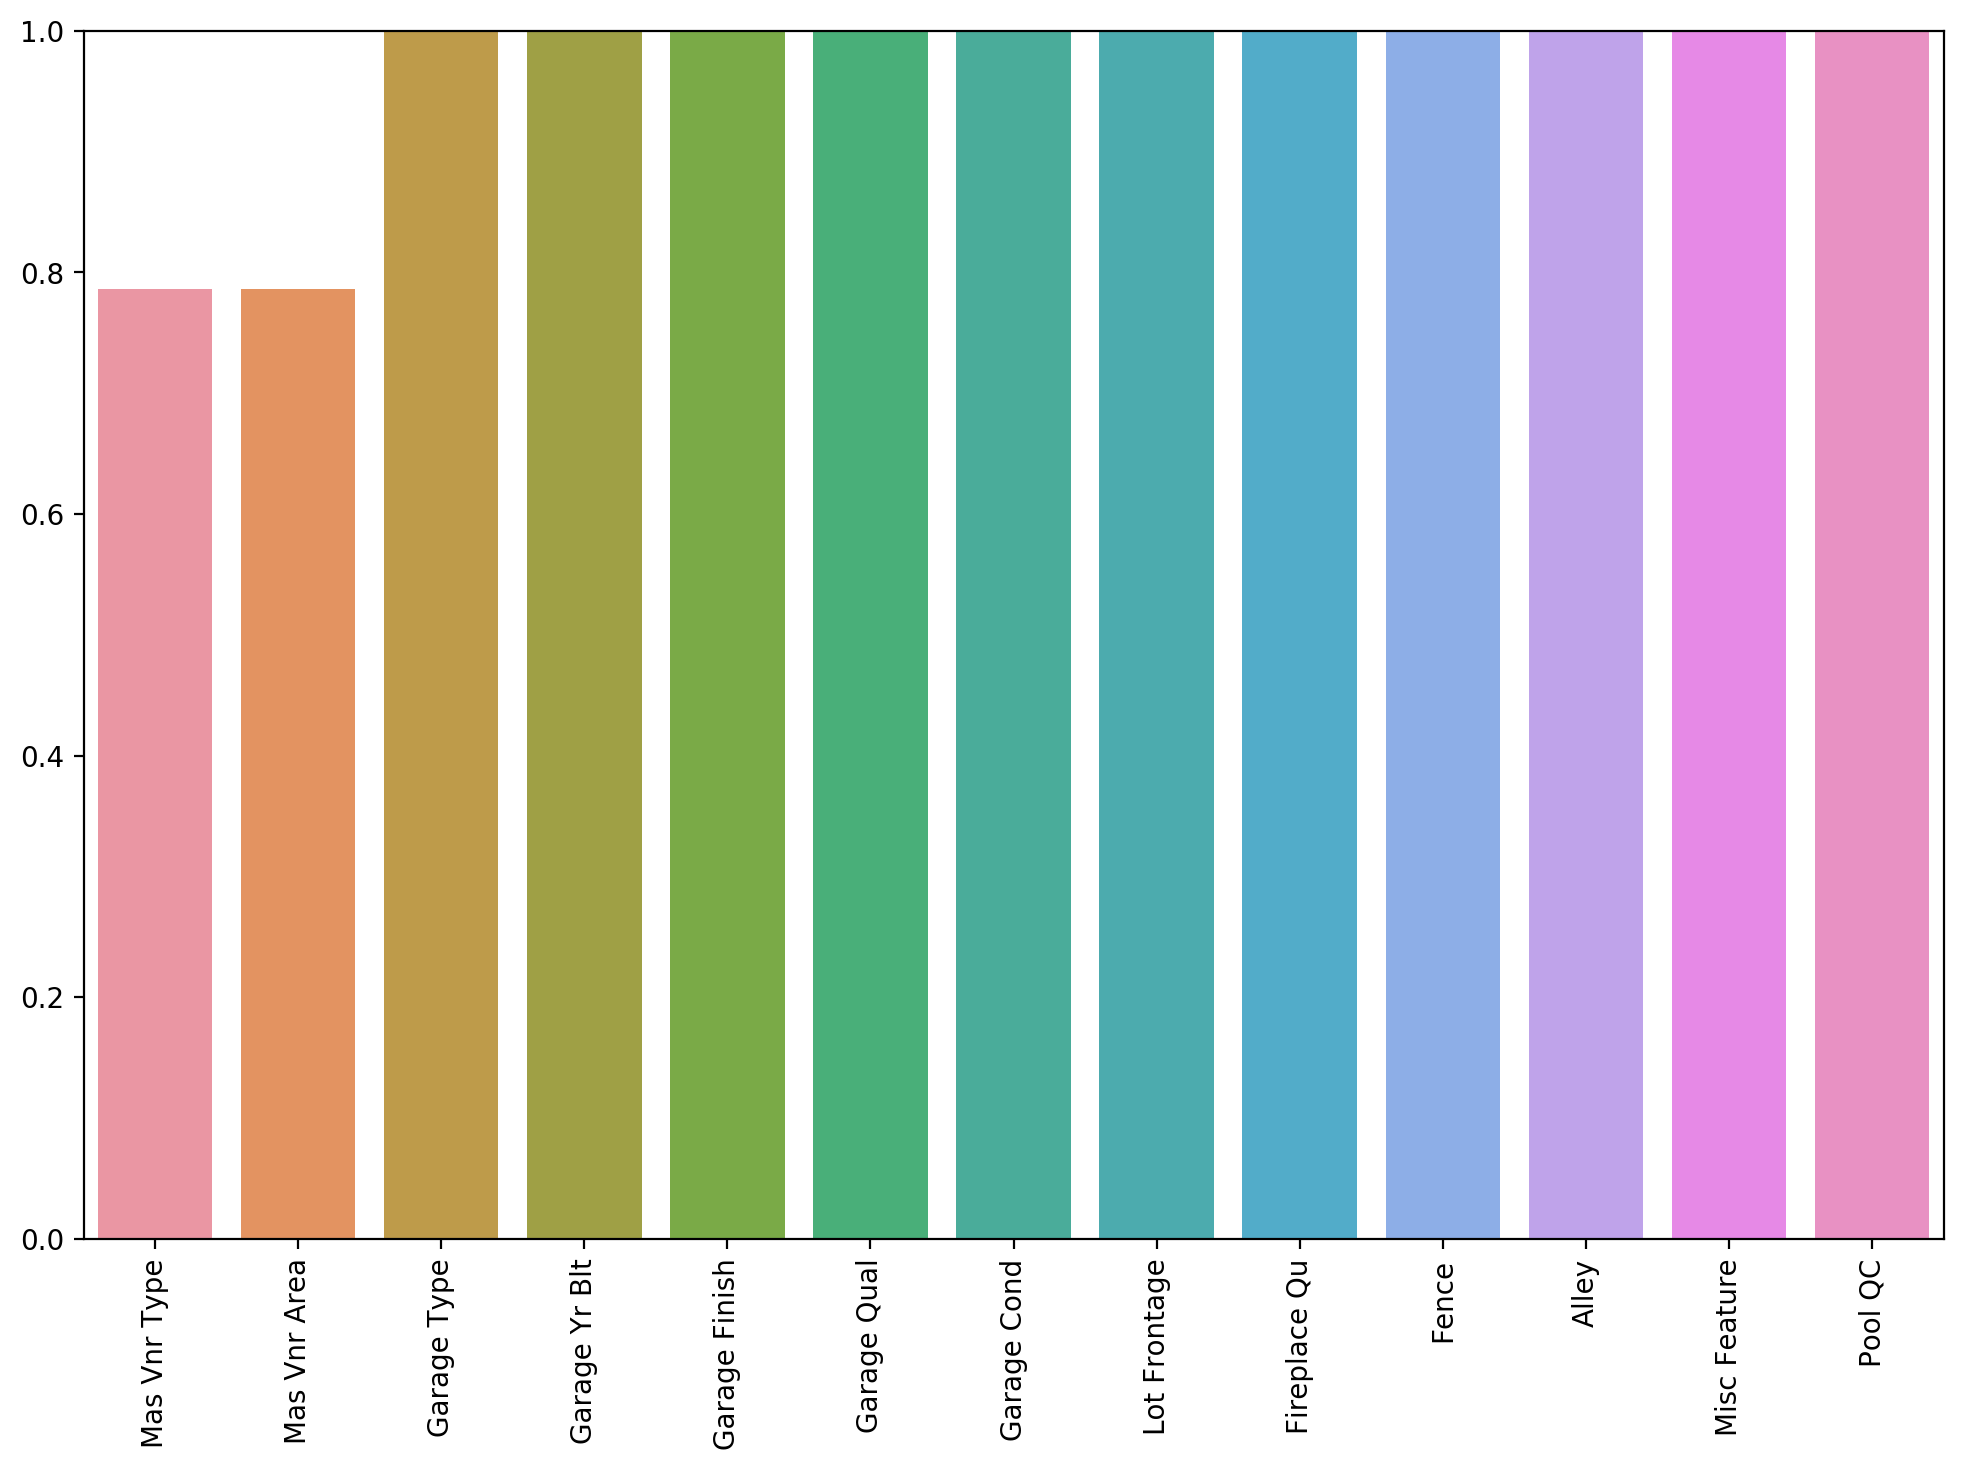

In [71]:
percent_nan = percent_miss(df)
plt.figure(figsize=(12,8), dpi=200)
sns.barplot(x=percent_nan.index, y=percent_nan);
plt.xticks(rotation=90);
plt.ylim(0,1)

E agora só temos duas colunas com menos de 1% dos dados faltantes (Mas Vnr Type & Mas Vnr Area).

Vamos então solucioná-los.

In [72]:
df['Mas Vnr Type'] = df['Mas Vnr Type'].fillna('None')

In [73]:
df['Mas Vnr Area'] = df['Mas Vnr Area'].fillna(0)

E agora só temos dados com mais de 1% faltantes.

Podemos confirmar ao apresentar novamente o gráfico.

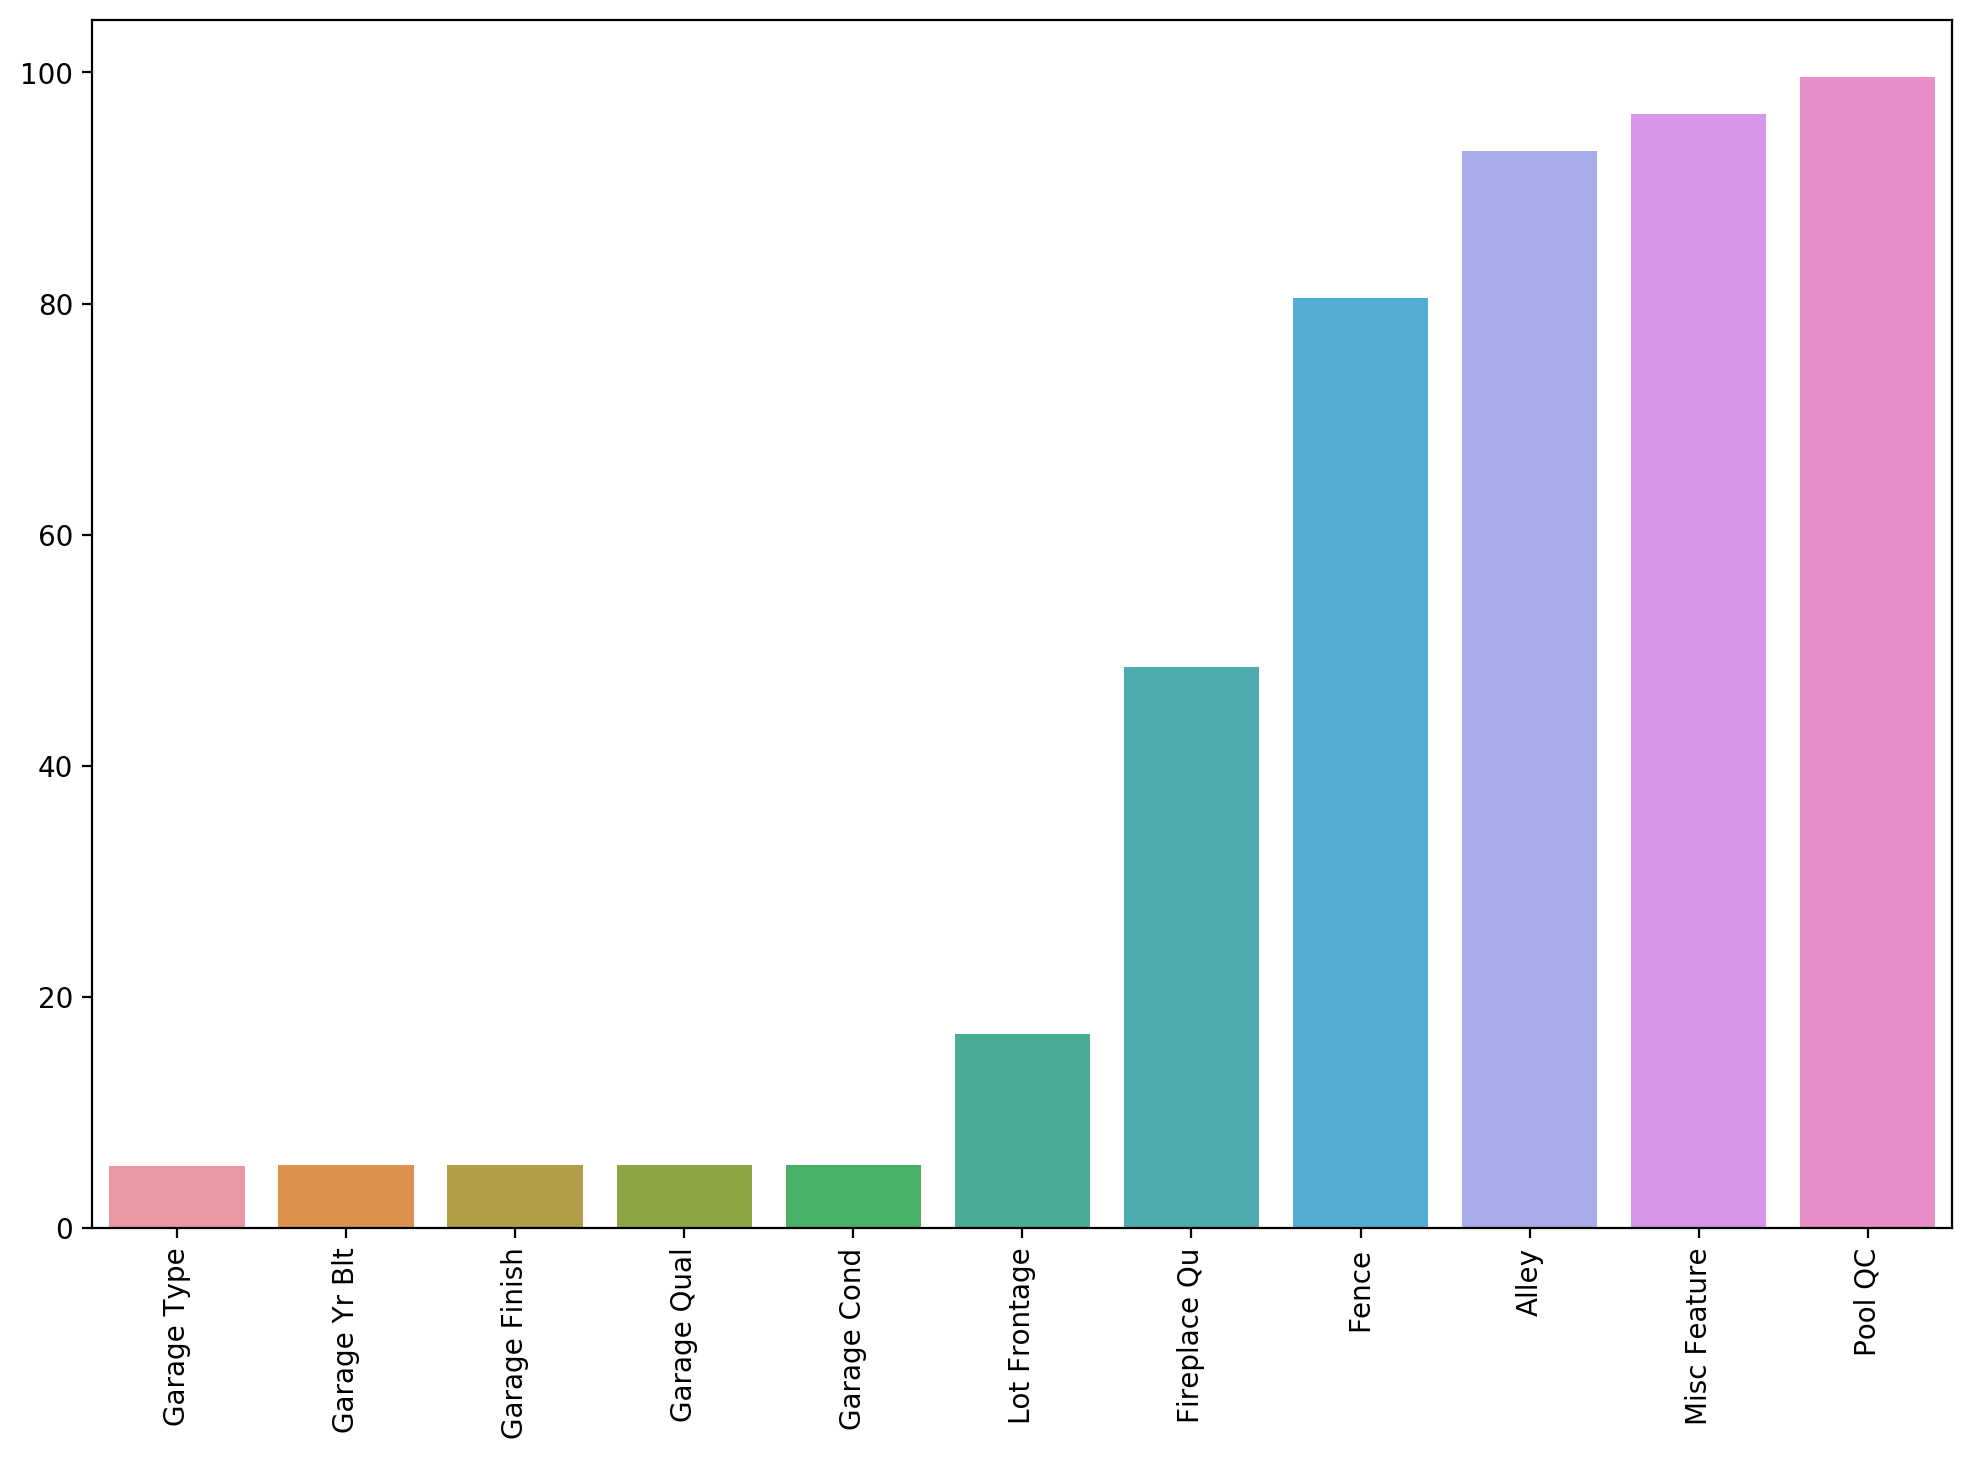

In [75]:
percent_nan = percent_miss(df)
plt.figure(figsize=(12,8), dpi=200)
sns.barplot(x=percent_nan.index, y=percent_nan);
plt.xticks(rotation=90);

As duas principais abordagens para lidar com essa situação seriam:

- Preencher estes valores que estão faltando
- Eliminar a **feature coluna** respectiva

Primeiramente vamos lidar com as colunas relativas às garagens (string).

In [76]:
gar_str_cols = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']

df[gar_str_cols] = df[gar_str_cols].fillna('None')

Novamente, apresentamos o gráfico.

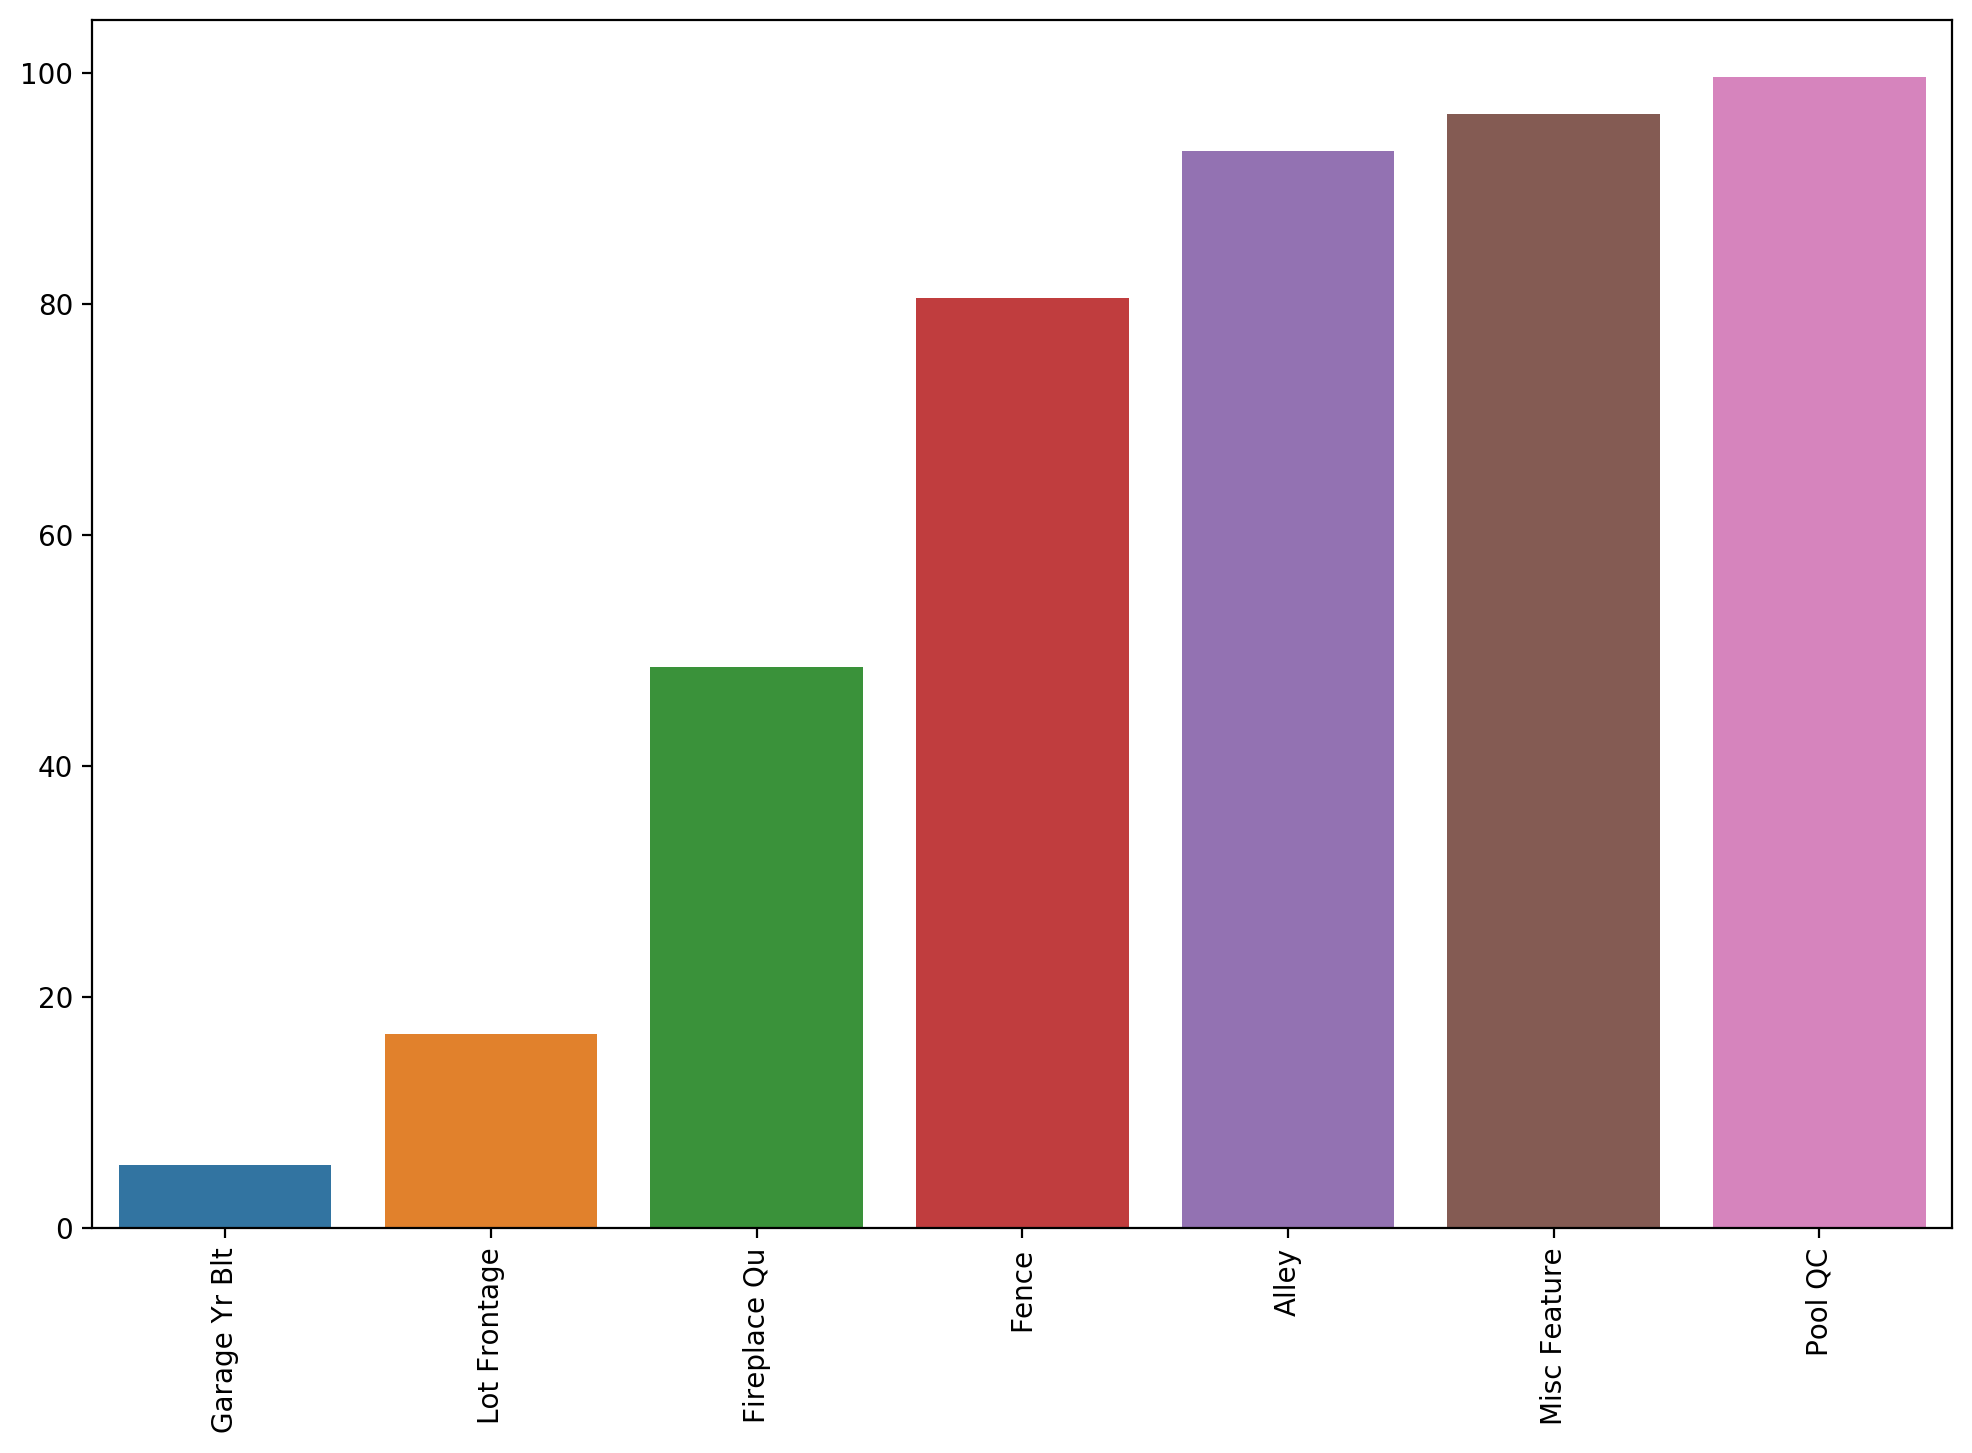

In [77]:
percent_nan = percent_miss(df)
plt.figure(figsize=(12,8), dpi=200)
sns.barplot(x=percent_nan.index, y=percent_nan);
plt.xticks(rotation=90);

Por fim, vamos preencher o ano de construção da garagem.

In [78]:
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)

Para as colunas que estão faltando uma grande quantidade de dados (Fence, Alley, Misc Feature e Pool QC), iremos simplesmente eliminá-las.

In [79]:
df = df.drop(['Pool QC', 'Misc Feature', 'Alley', 'Fence'], axis=1)

E agora vamos visualizar novamente o gráfico para ver o que resta.

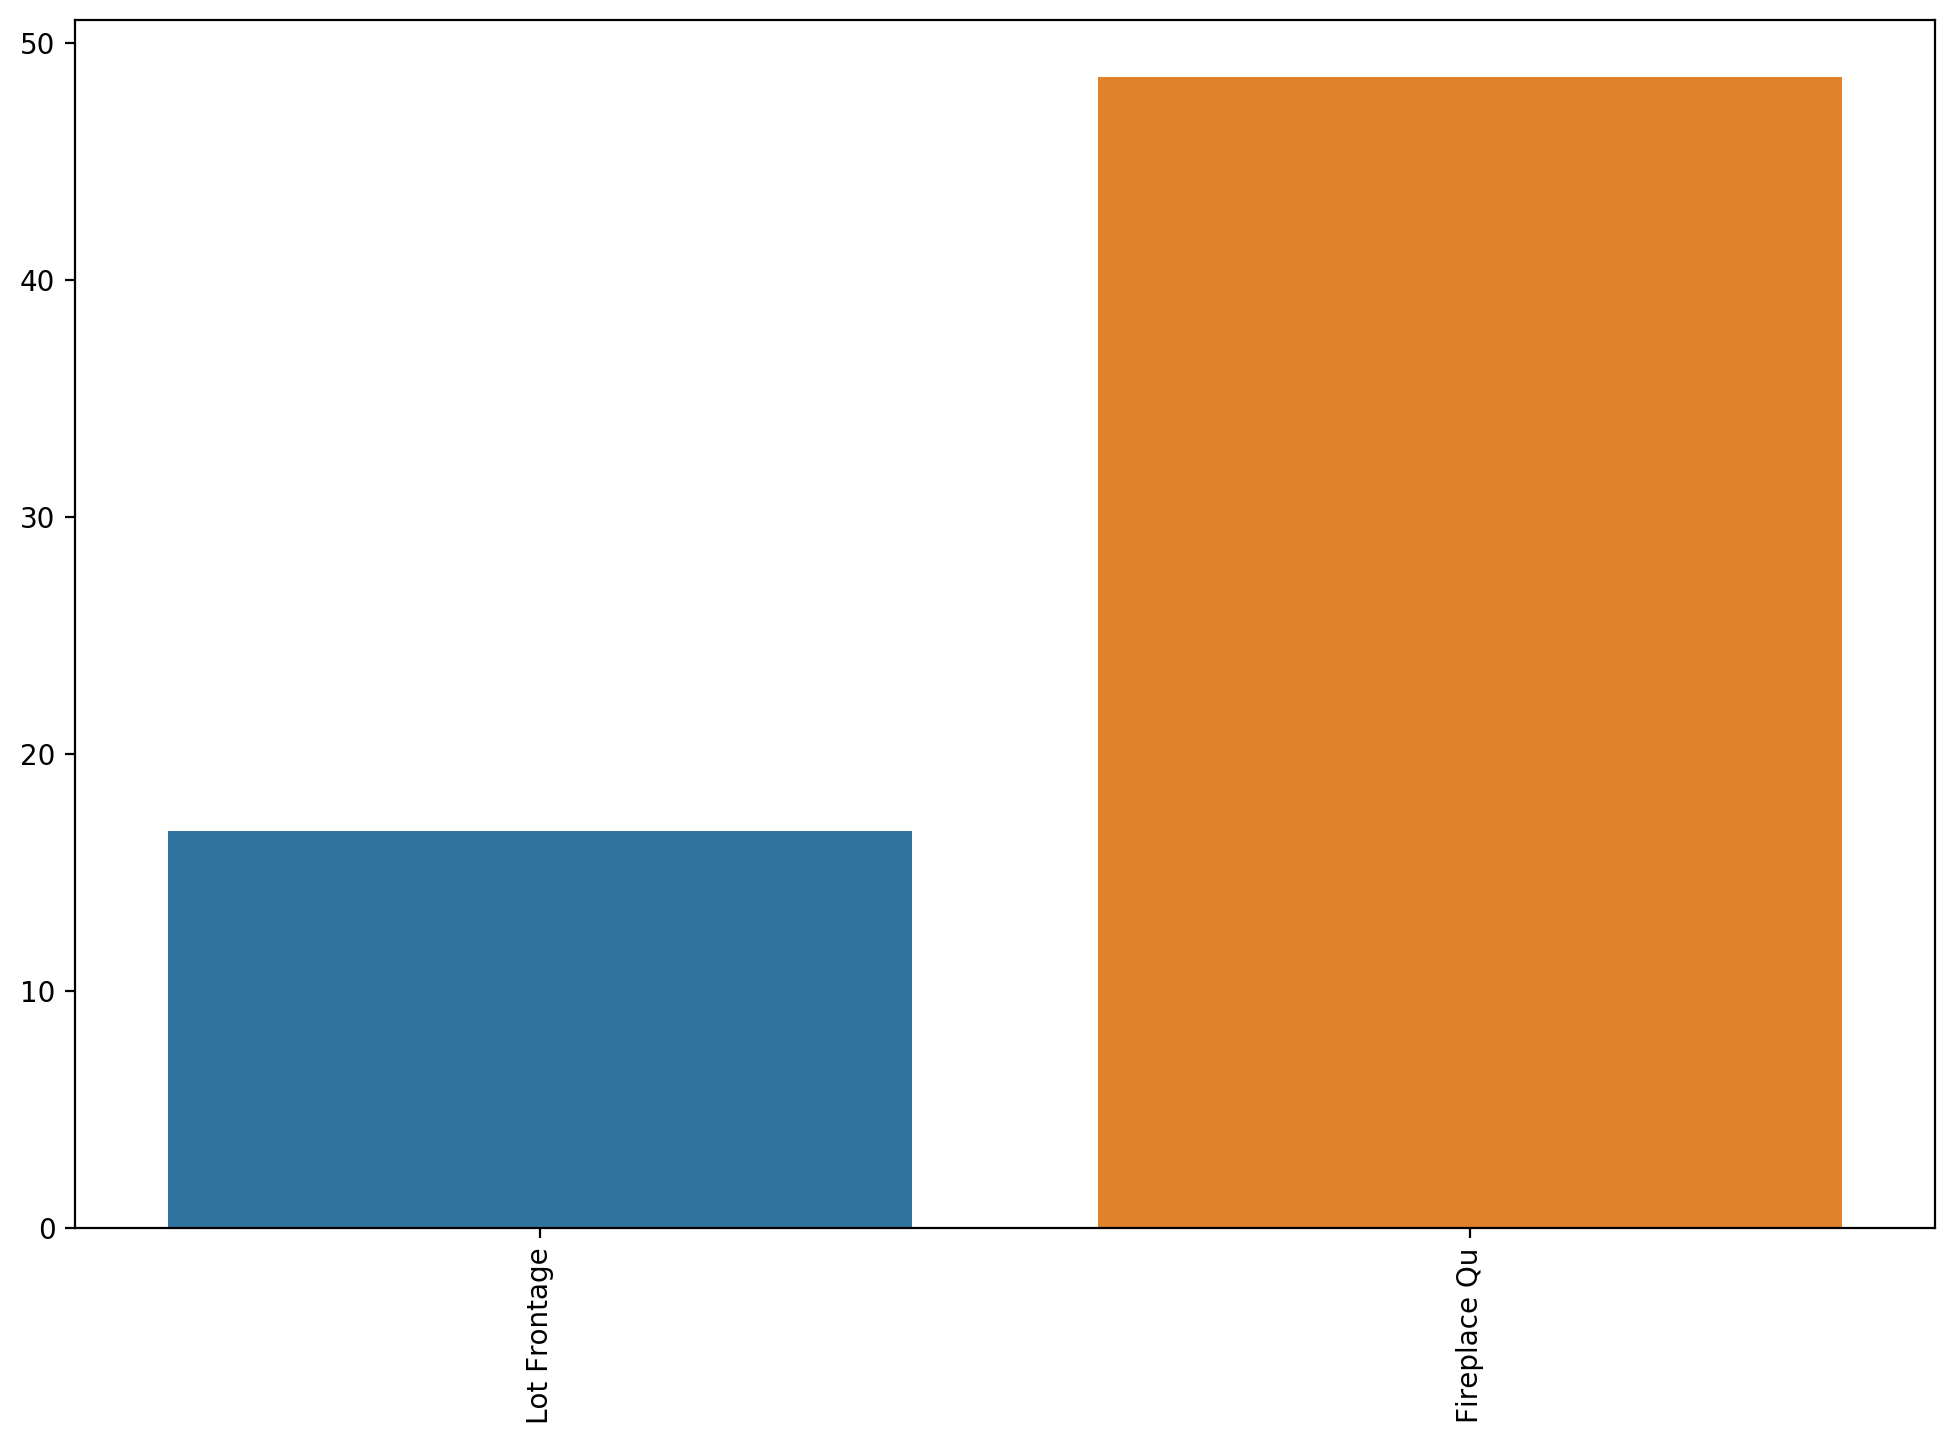

In [80]:
percent_nan = percent_miss(df)
plt.figure(figsize=(12,8), dpi=200)
sns.barplot(x=percent_nan.index, y=percent_nan);
plt.xticks(rotation=90);

Nos resta apenas duas colunas com dados faltantes:

- Lot Frontage
- Fireplace Qu

Vamos explorá-las.

In [82]:
df['Fireplace Qu'].value_counts()

Gd    741
TA    600
Fa     75
Po     46
Ex     43
Name: Fireplace Qu, dtype: int64

In [83]:
df['Fireplace Qu'].dtype

dtype('O')

Como **Fireplace Qu** se trata apenas de alguns dados string, podemos simplesmente preenchê-la com 'None'.

In [84]:
df['Fireplace Qu'] = df['Fireplace Qu'].fillna('None')

Só nos resta agora a coluna **Lot Frontage**.

In [85]:
df['Lot Frontage'].head(12)

0     141.0
1      80.0
2      81.0
3      93.0
4      74.0
5      78.0
6      41.0
7      43.0
8      39.0
9      60.0
10     75.0
11      NaN
Name: Lot Frontage, dtype: float64

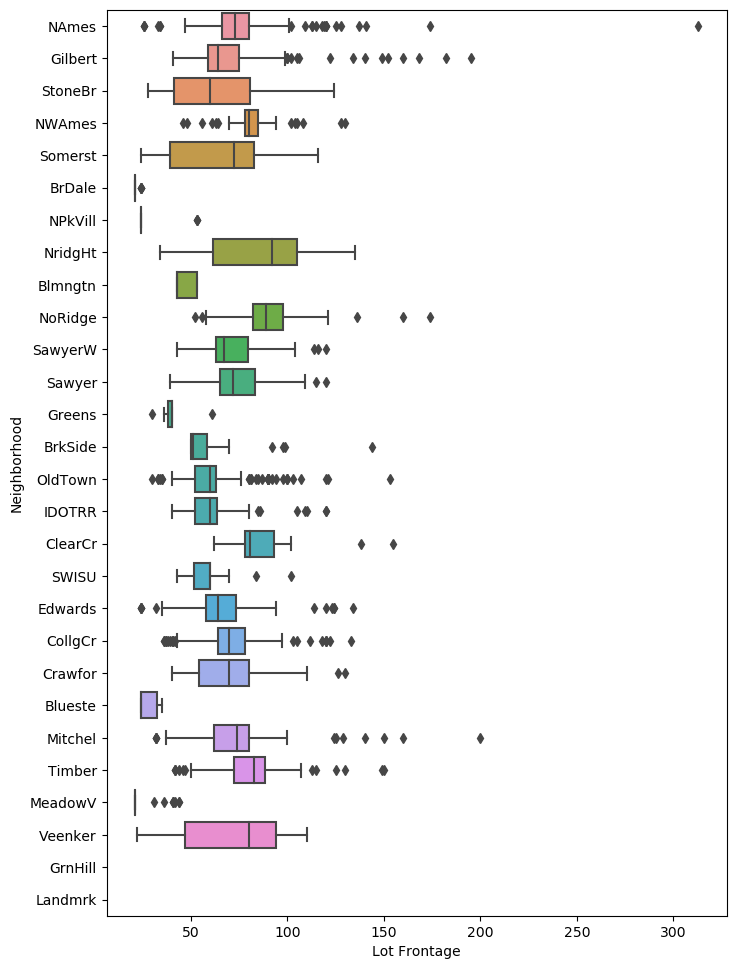

In [87]:
plt.figure(figsize=(8,12),dpi=100)
sns.boxplot(x='Lot Frontage', y='Neighborhood', data=df, orient='h');

Vamos usar a coluna **Neighborhood** para preencher **Lot Frontage**.

Através do método **groupby** obtemos a média de **Lot Frontage** por **Neighborhood**.

In [90]:
df.groupby('Neighborhood')['Lot Frontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    64.794286
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.383721
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

E então preencheremos os dados faltantes esta média.

In [92]:
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda value: value.fillna(value.mean()))

E agora estamos com o problema praticamente solucionado.

In [93]:
df.isnull().sum()

MS SubClass       0
MS Zoning         0
Lot Frontage      3
Lot Area          0
Street            0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 76, dtype: int64

Restam apenas três dados faltantes na coluna **Lot Frontage**, vamos preenchê-los com **0**.

In [95]:
df['Lot Frontage'] = df['Lot Frontage'].fillna(0)

In [96]:
df.isnull().sum()

MS SubClass       0
MS Zoning         0
Lot Frontage      0
Lot Area          0
Street            0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 76, dtype: int64

Finalmente, nossos dados estão prontos, não há mais nada faltando.

### Encoding

Uma vez que lidamos com os dados faltantes, chegou a hora de trabalharmos com os dados categóricos (strings).

Antes de tudo, podemos abrir o arquivo de descrição das **features** de nossos dados para compreendermos melhor com o que estamos experimentando.

In [99]:
with open('dados/Ames_Housing_Feature_Description.txt') as f:
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

E agora vamos carregar os nosso conjunto de dados limpo (sem dados faltantes).

In [100]:
df = pd.read_csv('dados/Ames_NO_Missing_Data.csv')
df.head(10)

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2010,WD,Normal,189900
5,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2010,WD,Normal,195500
6,120,RL,41.0,4920,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,170,0,0,0,0,4,2010,WD,Normal,213500
7,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,0,0,144,0,0,1,2010,WD,Normal,191500
8,120,RL,39.0,5389,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2010,WD,Normal,236500
9,60,RL,60.0,7500,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2010,WD,Normal,189000


Como podemos ver, não há dados faltantes nesse conjunto de dados.

In [102]:
df.isnull().sum()

MS SubClass       0
MS Zoning         0
Lot Frontage      0
Lot Area          0
Street            0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 76, dtype: int64

Primeiramente vamos lidar com a coluna **MS SubClass**, vamos transformá-la em string.

In [103]:
df['MS SubClass'] = df['MS SubClass'].apply(str)

A seguir, vamos apresentar um exemplo de como é simples transformar uma coluna de strings em **dummies**.

In [104]:
direction = pd.Series(['Up','Up','Down'])
direction

0      Up
1      Up
2    Down
dtype: object

In [105]:
pd.get_dummies(direction, drop_first=True)

,Up
0,1
1,1
2,0


E agora selecionaremos todas as colunas cujo tipo de dados é **object**, ou seja, string.

In [107]:
df.select_dtypes(include='object').head(10)

,MS SubClass,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type,Sale Condition
0,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,TA,Typ,Gd,Attchd,Fin,TA,TA,P,WD,Normal
1,20,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,TA,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
2,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Gd,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
3,20,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Ex,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
4,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,TA,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
5,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Gd,Typ,Gd,Attchd,Fin,TA,TA,Y,WD,Normal
6,120,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,...,Gd,Typ,None,Attchd,Fin,TA,TA,Y,WD,Normal
7,120,RL,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,...,Gd,Typ,None,Attchd,RFn,TA,TA,Y,WD,Normal
8,120,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
9,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Gd,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal


Guardamos a seleção das colunas com apenas strings em uma variável **object_df**.

In [108]:
object_df = df.select_dtypes(include='object')
object_df.head()

,MS SubClass,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type,Sale Condition
0,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,TA,Typ,Gd,Attchd,Fin,TA,TA,P,WD,Normal
1,20,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,TA,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
2,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Gd,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
3,20,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Ex,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
4,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,TA,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal


Dica, também podemos selecionar apenas as colunas numéricas de maneira semelhante.

In [109]:
numeric_df = df.select_dtypes(exclude='object')
numeric_df.head()

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,...,210,62,0,0,0,0,0,5,2010,215000
1,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,140,0,0,0,120,0,0,6,2010,105000
2,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,393,36,0,0,0,0,12500,6,2010,172000
3,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,...,0,0,0,0,0,0,0,4,2010,244000
4,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,212,34,0,0,0,0,0,3,2010,189900


E converteremos todas elas para **dummies**.

In [110]:
df_objects_dummies = pd.get_dummies(object_df, drop_first=True)
df_objects_dummies

,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2921,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2922,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2923,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


E agora devemos unir esses resultados com os nossos dados numéricos.

In [113]:
final_df = pd.concat([numeric_df, df_objects_dummies], axis=1)

E agora temos o nosso **DataFrame** final.

In [114]:
final_df.head()

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,...,0,0,0,0,1,0,0,0,1,0
1,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,0,0,0,0,1,0,0,0,1,0
2,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,0,0,0,0,1,0,0,0,1,0
3,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,...,0,0,0,0,1,0,0,0,1,0
4,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,0,0,0,0,1,0,0,0,1,0


### Sumarizando

Neste notebook aprendemos a lidar com outliers, dados faltantes (missing) e como codificar dados categóricos (strings) através da função pandas **get_dummies()**.

Lembrando que muitas dessas features categóricas que codificamos não são necessariamente importantes para o nosso algoritmo de Machine Learning, podendo inclusive serem descartadas.